# Discovering Frequent Patterns in Uncertain Big Data Using TubeP Algorithm

In this tutorial, we will discuss two approaches to find frequent patterns in uncertain big data using TubeP algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing TubeP on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the PUFGrowth algorithm

In [2]:
from PAMI.uncertainFrequentPattern.basic import TubeP as alg

#### Step 2: Specify the following input parameters

In [3]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/uncertainDatabases/uncertainTransaction_T10I4D100K.csv

File ‘uncertainTransaction_T10I4D100K.csv’ already there; not retrieving.



In [4]:
inputFile = 'uncertainTransaction_T10I4D100K.csv'
minimumSupportCount = 300  #Users can also specify this constraint between 0 to 1.
seperator = '\t'

#### Step 3: Execute the PUFGrowth algorithm

In [5]:
obj = alg.TubeP(iFile=inputFile, minSup=minimumSupportCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Uncertain Frequent patterns were generated successfully using TubeP algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [6]:
obj.save('frequentPatternsMinSupCount300.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [7]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [8]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 521


##### Step 5.2: Runtime consumed by the mining algorithm

In [9]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 42.87417531013489


##### Step 5.3: Total Memory consumed by the mining algorithm

In [10]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 723292160
Memory (USS): 701009920


# Advanced Tutorial on Implementing TubeP Algorithm

***

#### In this tutorial, we explain how the TubeP algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the TubeP algorithm and pandas data frame

In [11]:
from PAMI.uncertainFrequentPattern.basic import TubeP  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [15]:
inputFile = 'uncertainTransaction_T10I4D100K.csv'
seperator = '\t'
minimumSupportCountList = [300, 400, 500, 600, 700]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PUFGrowth algorithm

#### Step 3: Execute the TubeP algorithm using a for loop

In [16]:
algorithm = 'TubeP'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.TubeP(inputFile, minSup=minSupCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, obj.getPatterns(), obj.getRuntime(), obj.getMemoryRSS()]

Uncertain Frequent patterns were generated successfully using TubeP algorithm
Uncertain Frequent patterns were generated successfully using TubeP algorithm
Uncertain Frequent patterns were generated successfully using TubeP algorithm
Uncertain Frequent patterns were generated successfully using TubeP algorithm
Uncertain Frequent patterns were generated successfully using TubeP algorithm


In [17]:
print(result)

  algorithm  minSup  patterns    runtime     memory
0     TubeP     300       521  43.137744  726745088
1     TubeP     400       441  38.100590  702828544
2     TubeP     500       377  35.181783  677761024
3     TubeP     600       322  36.671079  650952704
4     TubeP     700       266  33.794305  620011520


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [18]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

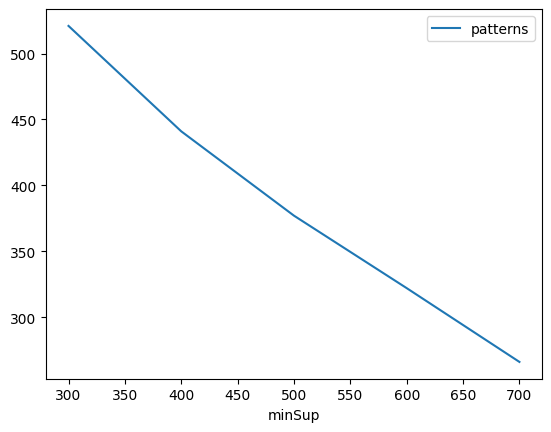

Graph for No Of Patterns is successfully generated!


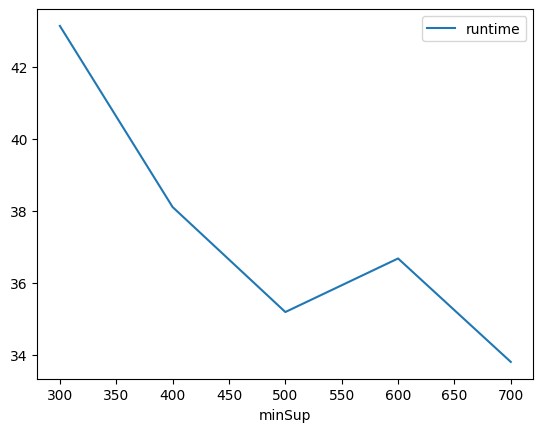

Graph for Runtime taken is successfully generated!


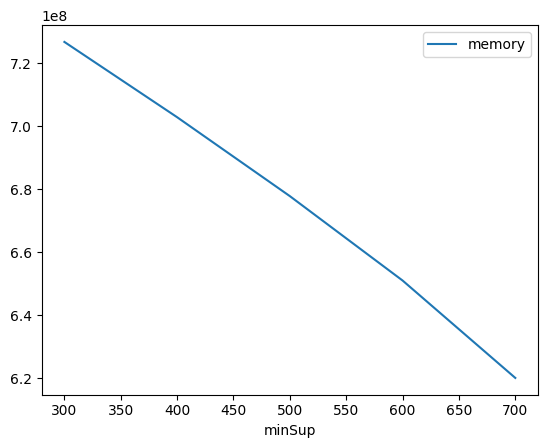

Graph for memory consumption is successfully generated!


In [19]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [20]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
